# HW06: ML and Causal Inference (due November 9th)

## Exercise 1: Double Machine learning with Lasso

In this exercise you will investigate a research question similar to the one in HW02. Namely, what is the effect of being in a Union on wages? You will use the same data as in HW02 (description of the variables can be found [here](https://rdrr.io/rforge/sampleSelection/man/nlswork.html)). Although, here instead of just including controls, you will estimate the effect of union membership on wages using double Lasso.

The regression of reference is the following: 

$$ln\_wage_i = \beta_0 + \beta_1 union_i +\varepsilon_i$$

In [209]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [210]:
# Load Data (NLSY)
df = pd.read_stata('http://www.stata-press.com/data/r16/nlswork.dta')
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [211]:
df.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
1,1,77,51,25.0,black,0.0,0.0,12.0,0,0.0,...,0.0,12.0,8.0,0.0,0.0,3.775641,1.500000,32.0,52.0,1.778681
2,1,80,51,28.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,5.294872,1.833333,45.0,75.0,2.551715
3,1,85,51,33.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,7.160256,1.916667,42.0,97.0,2.614172
4,1,87,51,35.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,8.987180,3.916667,45.0,95.0,2.536374


In [212]:
import numpy as np
Y = df['ln_wage']
D = df['union']

In [213]:
import statsmodels.formula.api as smf

model = smf.ols('Y ~ D', data=D)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     741.9
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          4.56e-159
Time:                        20:13:34   Log-Likelihood:                -8266.7
No. Observations:               13452   AIC:                         1.654e+04
Df Residuals:                   13450   BIC:                         1.655e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6564      0.004    377.147      0.0

**What could be potential sources of bias (i.e. confounders)?**

Some confounders could include age and occupation code. These are confounders because they can impact both the treatment and the outcome. For example, younger people have had less time to join a union and may be predisposed towards certain types of jobs. 

In [214]:
# fill in X with all predictors that are not colliders
X_cat = df[['year', "race", "msp", "nev_mar","not_smsa","c_city","south",'union']]
X_cont = df[["age", "wks_ue","tenure","hours","wks_work",]]

In [215]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

X_cat_columns = X_cat.columns
X_cat = encoder.fit_transform(X_cat)
X_cat = X_cat.astype('float32')
X_cat = pd.DataFrame(X_cat, columns=X_cat_columns)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

In [216]:
# TODO: standardize all continuous variable in X to variance one
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_cont_st = scaler.fit_transform(X_cont)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [217]:
# join all Xs
X = pd.merge(X_cat, X_cont, left_index=True, right_index=True)
X

,year,race,msp,nev_mar,not_smsa,c_city,south,union,age,wks_ue,tenure,hours,wks_work
0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,20.0,0.0,0.916667,40.0,51.0
1,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0,0.0,1.500000,32.0,52.0
2,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28.0,0.0,1.833333,45.0,75.0
3,9.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,33.0,0.0,1.916667,42.0,97.0
4,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,0.0,3.916667,45.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13447,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,32.0,0.0,2.083333,40.0,52.0
13448,5.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,33.0,0.0,3.000000,39.0,47.0
13449,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,38.0,0.0,8.000000,38.0,56.0
13450,9.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,40.0,0.0,0.000000,40.0,52.0


In [218]:
# TODO: generate train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [219]:
# TODO: define DML model with double LASSO

from econml.dml import  LinearDML
from sklearn.linear_model import LassoCV, LogisticRegressionCV

# LinearDML: https://econml.azurewebsites.net/_autosummary/econml.dml.LinearDML.html
lasso_mod = LassoCV(cv=5)
lasso_mod.fit(X_train,y_train)
log_mod = LogisticRegressionCV(cv=5)
log_mod.fit(X_cat,X_cat['union'])
est = LinearDML(model_y=lasso_mod,
                model_t=log_mod,    
                discrete_treatment=False,
                linear_first_stages=True,
                cv=5)
X_train

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

,year,race,msp,nev_mar,not_smsa,c_city,south,union,age,wks_ue,tenure,hours,wks_work
9133,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0,0.0,2.000000,40.0,74.0
12033,11.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,35.0,0.0,15.083333,40.0,69.0
11515,7.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,31.0,40.0,1.416667,40.0,58.0
7077,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,20.0,0.0,1.416667,40.0,51.0
1886,5.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,28.0,0.0,10.000000,35.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,24.0,0.0,4.250000,40.0,52.0
13418,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,23.0,4.0,1.000000,40.0,48.0
5390,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,27.0,0.0,4.416667,40.0,58.0
860,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,22.0,0.0,2.666667,38.0,52.0


In [220]:
T_train = X_train[['union']] 
X_train = X_train.drop(columns=['union'])

print(X_train)
print(T_train)
est.fit(Y=y_train,X=X_train,T=T_train) 

       year  race  msp  nev_mar  not_smsa  c_city  south   age  wks_ue  \
9133   11.0   0.0  0.0      0.0       0.0     0.0    1.0  40.0     0.0   
12033  11.0   0.0  0.0      0.0       0.0     1.0    1.0  35.0     0.0   
11515   7.0   2.0  1.0      0.0       0.0     0.0    1.0  31.0    40.0   
7077    3.0   0.0  0.0      1.0       0.0     1.0    1.0  20.0     0.0   
1886    5.0   2.0  1.0      0.0       0.0     0.0    0.0  28.0     0.0   
...     ...   ...  ...      ...       ...     ...    ...   ...     ...   
5191    2.0   2.0  1.0      0.0       0.0     1.0    0.0  24.0     0.0   
13418   1.0   0.0  0.0      0.0       1.0     0.0    1.0  23.0     4.0   
5390    5.0   0.0  1.0      0.0       0.0     1.0    0.0  27.0     0.0   
860     0.0   2.0  0.0      1.0       0.0     1.0    0.0  22.0     0.0   
7270    2.0   0.0  1.0      0.0       0.0     1.0    1.0  28.0     0.0   

          tenure  hours  wks_work  
9133    2.000000   40.0      74.0  
12033  15.083333   40.0      69.0  
115

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
A column-vector y was passed when a 1d array was expected. Please change

In [221]:
# TODO: display a summary
est.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
year,-0.0,0.005,-0.033,0.974,-0.009,0.009
race,-0.03,0.009,-3.194,0.001,-0.048,-0.011
msp,0.027,0.021,1.251,0.211,-0.015,0.069
nev_mar,0.02,0.026,0.774,0.439,-0.031,0.071
not_smsa,0.028,0.02,1.406,0.16,-0.011,0.066
c_city,-0.025,0.019,-1.34,0.18,-0.062,0.012
south,-0.044,0.019,-2.314,0.021,-0.081,-0.007
age,0.003,0.003,1.283,0.199,-0.002,0.009
wks_ue,-0.0,0.002,-0.115,0.908,-0.003,0.003
tenure,-0.003,0.002,-1.511,0.131,-0.008,0.001


**Compare the estimates form this and the previous regression. How do these change?**
The previous estimate produced the following result: coefficient = 0.2502, r^2 =.052, t = 27.238. This means that while the union status is a weak predictor, the signficance of the result means that there is a relationship between the two variables. 

This regression produced the following result: coefficient .228, stderr .009, tstat 2.699. Because the standard error is so low, this means that the new model predicts the ln(wage) very accurately. This is likely due to the different approach to the regression. 

**Interpret the coefficient from the double ml approach. Can it be interpreted as causal?**
Yes, it can be interpreted as causal. The coefficient of .228 means that ln(wage) is predicted to increase by .194 as a result of being in a union. It can be interpreted as causual because of the removed observed confounders. 

## Exercise 2: Heterogenous Treatment Effects with double Lasso

This exercise will be a simple extension of exercise 1. We just want to estimate a CausalForestDML model where we can analyze heterogeneous treatment effects.

In [222]:
# CausalForestDML: https://econml.azurewebsites.net/_autosummary/econml.dml.CausalForestDML.html
from econml.dml import CausalForestDML

In [223]:
# TODO: define the model. check the documentation, you might need to specify less things than you think...
est2 = CausalForestDML()

In [224]:
# TODO: tune the model
est2 = est2.tune(Y=y_train,T=T_train,X=X_train)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [230]:
# TODO: fit the model
est2.fit(y_train,T_train,X=X_train,cache_values=True)

       union
9133     0.0
12033    0.0
11515    0.0
7077     1.0
1886     1.0
...      ...
5191     1.0
13418    0.0
5390     0.0
860      0.0
7270     0.0

[10761 rows x 1 columns]


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [231]:
# TODO: display summary
summ = est2.summary()
print(summ)

Population summary of CATE predictions on Training Data


Doubly Robust ATE on Training Data Results:  Doubly Robust ATE calculation on training data is available only on discrete treatments!
Doubly Robust ATT on Training Data Results:  Doubly Robust ATT calculation on training data is available only on discrete treatments!
               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.173        0.11  1.57  0.116        -0.043         0.389
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.116           0.007           0.465
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.16         -0.087          0.563
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


([<matplotlib.axis.XTick at 0x12fa2db10>,
 [Text(0, 0, 'year'),
  Text(1, 0, 'race'),
  Text(2, 0, 'msp'),
  Text(3, 0, 'nev_mar'),
  Text(4, 0, 'not_smsa'),
  Text(5, 0, 'c_city'),
  Text(6, 0, 'south'),
  Text(7, 0, 'age'),
  Text(8, 0, 'wks_ue'),
  Text(9, 0, 'tenure'),
  Text(10, 0, 'hours'),
  Text(11, 0, 'wks_work')])

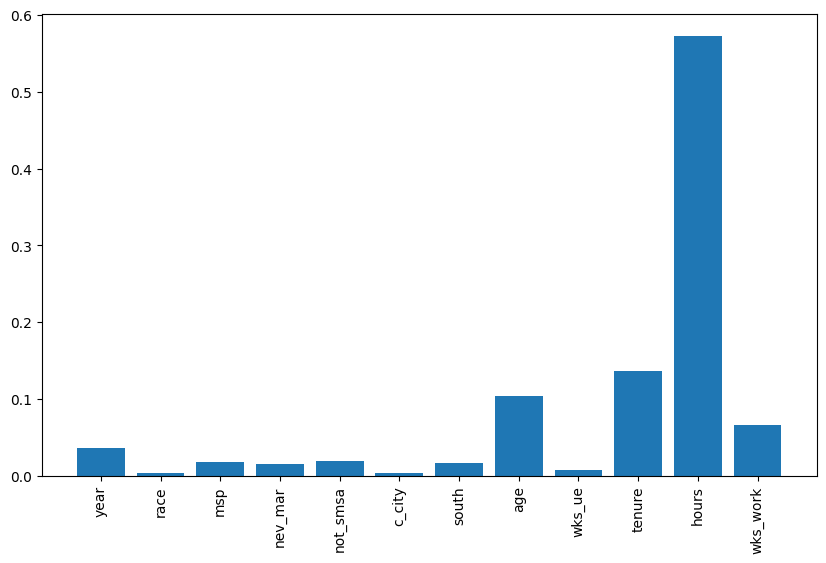

In [234]:
# TODO: visualize the feature importance
from matplotlib import pyplot as plt
feature_importance = est2.feature_importances_
feat_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feat_names)), feat_names, rotation=90)
